c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


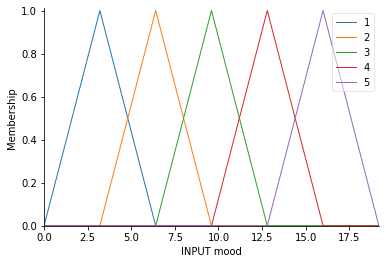

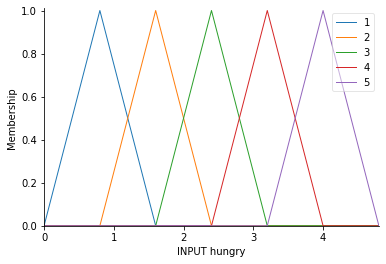

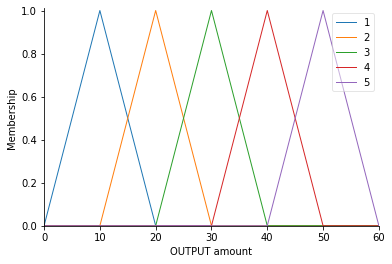

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


mood = ctrl.Antecedent(np.arange(0, 20,   3.2), 'INPUT mood')
hungry = ctrl.Antecedent(np.arange(0, 5,   0.8), 'INPUT hungry')
amount = ctrl.Consequent(np.arange(0, 70,   10), 'OUTPUT amount')


mood['1'] = fuzz.trimf(mood.universe, [0, 3.2, 6.4])
mood['2'] = fuzz.trimf(mood.universe, [3.2, 6.4, 9.6])
mood['3'] = fuzz.trimf(mood.universe, [6.4, 9.6, 12.8])
mood['4'] = fuzz.trimf(mood.universe, [9.6, 12.8, 16])
mood['5'] = fuzz.trimf(mood.universe, [12.8, 16, 19.2])

hungry['1'] = fuzz.trimf(hungry.universe, [0, 0.8, 1.6])
hungry['2'] = fuzz.trimf(hungry.universe, [0.8, 1.6, 2.4])
hungry['3'] = fuzz.trimf(hungry.universe, [1.6, 2.4, 3.2])
hungry['4'] = fuzz.trimf(hungry.universe, [2.4, 3.2, 4])
hungry['5'] = fuzz.trimf(hungry.universe, [3.2, 4, 4.8])

amount['1'] = fuzz.trimf(amount.universe, [0, 10, 20])
amount['2'] = fuzz.trimf(amount.universe, [10, 20, 30])
amount['3'] = fuzz.trimf(amount.universe, [20, 30, 40])
amount['4'] = fuzz.trimf(amount.universe, [30, 40, 50])
amount['5'] = fuzz.trimf(amount.universe, [40, 50, 60])


mood.view()
hungry.view()
amount.view()

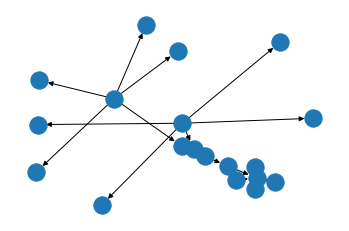

In [2]:

rule1 = ctrl.Rule(mood['1'] & hungry['1'], amount['1'])
rule2 = ctrl.Rule(mood['2'] & hungry['1'], amount['2'])
rule3 = ctrl.Rule(mood['3'] & hungry['1'], amount['2'])
rule4 = ctrl.Rule(mood['4'] & hungry['1'], amount['3'])
rule5 = ctrl.Rule(mood['5'] & hungry['1'], amount['3'])

rule6 = ctrl.Rule(mood['1'] & hungry['2'], amount['1'])
rule7 = ctrl.Rule(mood['2'] & hungry['2'], amount['2'])
rule8 = ctrl.Rule(mood['3'] & hungry['2'], amount['2'])
rule9 = ctrl.Rule(mood['4'] & hungry['2'], amount['3'])
rule10 = ctrl.Rule(mood['5'] & hungry['2'], amount['3'])

rule11 = ctrl.Rule(mood['1'] & hungry['3'], amount['2'])
rule12 = ctrl.Rule(mood['2'] & hungry['3'], amount['3'])
rule13 = ctrl.Rule(mood['3'] & hungry['3'], amount['3'])
rule14 = ctrl.Rule(mood['4'] & hungry['3'], amount['4'])
rule15 = ctrl.Rule(mood['5'] & hungry['3'], amount['4'])

rule16 = ctrl.Rule(mood['1'] & hungry['4'], amount['3'])
rule17 = ctrl.Rule(mood['2'] & hungry['4'], amount['3'])
rule18 = ctrl.Rule(mood['3'] & hungry['4'], amount['4'])
rule19 = ctrl.Rule(mood['4'] & hungry['4'], amount['4'])
rule20 = ctrl.Rule(mood['5'] & hungry['4'], amount['5'])
                        
rule21 = ctrl.Rule(mood['1'] & hungry['5'], amount['3'])
rule22 = ctrl.Rule(mood['2'] & hungry['5'], amount['4'])
rule23 = ctrl.Rule(mood['3'] & hungry['5'], amount['4'])
rule24 = ctrl.Rule(mood['4'] & hungry['5'], amount['5'])
rule25 = ctrl.Rule(mood['5'] & hungry['5'], amount['5'])                        


rule1.view()
amountping_ctrl = ctrl.ControlSystem(
    [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17,
     rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])

amountping = ctrl.ControlSystemSimulation(amountping_ctrl)
amountping.input['INPUT mood'] = 19
amountping.input['INPUT hungry'] = 3




ปริมาณการจัดเตรียมอาหาร: 44.99999999999999


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


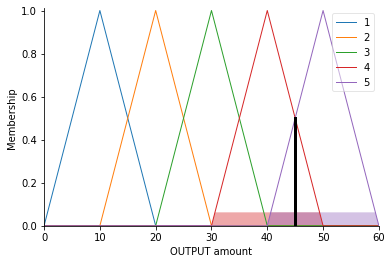

In [3]:
amountping.compute()
amount.view(sim=amountping)
print("ปริมาณการจัดเตรียมอาหาร:",amountping.output['OUTPUT amount'])
